In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
array = np.arange (1, 97)

array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96])

In [89]:
def closest_square (array):
    a = np.floor (np.sqrt (array.shape[0]))
    while array.shape[0] % a:
        a -= 1
    return (int(a), int(array.shape[0]/a))


(8, 12)


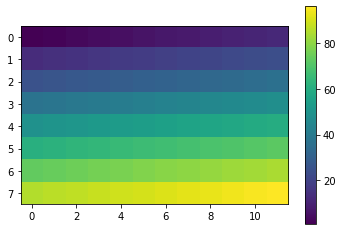

In [91]:
print (array.reshape (closest_square (array)).shape)
plt.imshow (array.reshape (closest_square (array)))
plt.colorbar ()
plt.show ()